In [183]:
'''>>>>> start CodeP4.2F25
    V.P. Carey ME249, Fall 2025 

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import math, numpy
#Part 2 input data: Mode number, Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into training and validation sets 
xdata = [[0., 10.0, 200.0, 24.3], 
 [1., 10.0, 200.0, 24.3], 
 [2., 10.0, 200.0, 24.3], 
 [0., 10.0, 200.0, 51.8], 
 [1., 10.0, 200.0, 51.8],
         
 [2., 10.0, 200.0, 51.8], 
 [0., 10.0, 200.0, 96.2], 
 [1., 10.0, 200.0, 96.2], 
 [2., 10.0, 200.0, 96.1], 
 [0., 10.0, 200.0, 170.1],
         
 [1., 10.0, 200.0, 170.1], 
 [2., 10.0, 200.0, 170.1], 
 [0., 10.0, 500.0, 7.0], 
 [1., 10.0, 500.0, 7.0], 
 [2., 10.0, 500.0, 7.0], 
         
 [0., 10.0, 500.0, 21.2], 
 [1., 10.0, 500.0, 21.2], 
 [2., 10.0, 500.0, 21.2], 
 [0., 10.0, 500.0, 43.2], 
 [1., 10.0, 500.0, 43.2], 
         
 [1., 10.0, 700.0, 4.9], 
 [2., 10.0, 700.0, 4.9], 
 [0., 10.0, 700.0, 14.3], 
 [1., 10.0, 700.0, 14.3], 
 [2., 10.0, 700.0, 14.3],
         
 [2., 10.0, 500.0, 43.2], 
 [0., 10.0, 500.0, 79.1], 
 [1., 10.0, 500.0, 79.1], 
 [2., 10.0, 500.0, 79.1], 
 [0., 10.0, 700.0, 4.8], 
         
 [0., 10.0, 700.0, 29.7], 
 [1., 10.0, 700.0, 29.7], 
 [2., 10.0, 700.0, 29.7], 
 [0., 10.0, 700.0, 55.3], 
 [1., 10.0, 700.0, 55.3], 
 [2., 10.0, 700.0, 55.3], 
         
 [0., 10.0, 1000.0, 3.92], 
 [1., 10.0, 1000.0, 3.92], 
 [2., 10.0, 1000.0, 3.92], 
 [0., 10.0, 1000.0, 11.7], 
 [1., 10.0, 1000.0, 11.7], 
         
 [2., 10.0, 1000.0, 11.7], 
 [0., 10.0, 1000.0, 25.2], 
 [1., 10.0, 1000.0, 25.2], 
 [2., 10.0, 1000.0, 25.2], 
 [0., 10.0, 1000.0, 41.6], 
 [1., 10.0, 1000.0, 41.6], 
 [2., 10.0, 1000.0, 41.6]]

#Part 2 output data for above specified Mode and conditons: VL (V) and Power out (W)
ydata = [[46.0, 87.3], 
         [27.9, 64.2], 
         [27.9, 32.1], 
         [46.0, 40.9], 
         [92.1, 163.9], 
         [59.5, 68.5], 
         [46.0, 22.0], 
         [92.1, 88.2], 
         [110.6, 127.2], 
         [46.0, 12.4], 
         [92.1, 49.9], 
         [184.2, 199.6], 
         [48.4, 335.3], 
         [20.8, 124.3], 
         [20.8, 62.1], 
         [48.4, 110.7], 
         [96.8, 442.9], 
         [63.1, 188.2], 
         [48.4, 54.3], 
         [96.9, 217.3], 
         [128.7, 383.6], 
         [48.4, 29.6], 
         [96.8, 118.7], 
         [193.7, 474.8], 
         [49.3, 496.1], 
         [20.4, 171.2], 
         [20.4, 85.6], 
         [49.3, 169.9], 
         [98.6, 679.9], 
         [59.7, 249.8], 
         [49.3, 81.8], 
         [98.6, 327.4], 
         [124.1, 518.9], 
         [49.305, 43.9], 
         [98.6, 175.8], 
         [197.2, 703.3], 
         [50.8, 658.9], 
         [23.1, 272.9], 
         [23.1, 136.4], 
         [50.8, 220.7], 
         [101.6, 883.1], 
         [69.0, 407.2], 
         [50.8, 102.5], 
         [101.6, 410.0], 
         [148.6, 877.2], 
         [50.8, 62.0], 
         [101.6, 248.3], 
         [203.2, 993.5]]

# Convert to numpy arrays to calculate medians
xarray_full = np.array(xdata)
yarray_full = np.array(ydata)

# Define median values of input variables (excluding Mode M)
Tamed = np.median(xarray_full[:, 1])  # Temperature median
IDmed = np.median(xarray_full[:, 2])  # Irradiance median
RLmed = np.median(xarray_full[:, 3])  # Load resistance median

# Define median values of output variables
VLmed = np.median(yarray_full[:, 0])  # Voltage median
Wdmed = np.median(yarray_full[:, 1])  # Power median

# Normalize data by dividing by medians (do NOT normalize Mode M)
xdata_normalized = xarray_full.copy()
xdata_normalized[:, 1] = xarray_full[:, 1] / Tamed  # Normalize T_air
xdata_normalized[:, 2] = xarray_full[:, 2] / IDmed  # Normalize I_D
xdata_normalized[:, 3] = xarray_full[:, 3] / RLmed  # Normalize R_L
# Mode M (column 0) remains unchanged

ydata_normalized = yarray_full / np.array([VLmed, Wdmed])

# Randomly split normalized data into training set (2/3) and validation set (1/3)
np.random.seed(42)
indices = np.random.permutation(len(xdata_normalized))
train_size = int(len(xdata_normalized) * 2 / 3)

train_indices = indices[:train_size]
val_indices = indices[train_size:]

xarray = xdata_normalized[train_indices]
yarray = ydata_normalized[train_indices]
xarray_val = xdata_normalized[val_indices]
yarray_val = ydata_normalized[val_indices]

print('Training set shape:', xarray.shape)
print('Validation set shape:', xarray_val.shape)
print('Medians - Tamed:', Tamed, '°C, IDmed:', IDmed, 'W/m², RLmed:', RLmed, 'Ω')
print('Medians - VLmed:', VLmed, 'V, Wdmed:', Wdmed, 'W')




Training set shape: (32, 4)
Validation set shape: (16, 4)
Medians - Tamed: 10.0 °C, IDmed: 600.0 W/m², RLmed: 27.45 Ω
Medians - VLmed: 55.15 V, Wdmed: 170.55 W


In [184]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that's fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(13, activation='elu', input_shape=[4],  kernel_initializer=initializer),
    keras.layers.Dense(26, activation='elu',  kernel_initializer=initializer),
    keras.layers.Dense(13, activation='elu', kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [185]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [186]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model_4.2.keras', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=1800,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model_4.2.keras')

Epoch 1/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 6.0603
Epoch 2/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9017
Epoch 3/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8940
Epoch 4/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9985
Epoch 5/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2133
Epoch 6/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6779
Epoch 7/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5888
Epoch 8/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5715
Epoch 9/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5899
Epoch 10/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7266
Epoch 11/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8369
Epoch 12/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6519
Epoch 13/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6431
Epoch 14/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6387
Epoch 15/1800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6658
Epo

In [187]:
# Training set predictions

train_predictions = model.predict(xarray)

# Denormalize predictions
train_pred_VL = train_predictions[:, 0] * VLmed
train_pred_Wd = train_predictions[:, 1] * Wdmed

# Denormalize actual values
train_actual_VL = yarray[:, 0] * VLmed
train_actual_Wd = yarray[:, 1] * Wdmed

# Calculate MAE
mae_train_VL = np.mean(np.abs(train_pred_VL - train_actual_VL))
mae_train_Wd = np.mean(np.abs(train_pred_Wd - train_actual_Wd))

print('============================================================')
print('Training Set Prediction Results')
print('============================================================')
print(f'Training MAE - Voltage VL: {mae_train_VL:.4f} V')
print(f'Training MAE - Power Wd: {mae_train_Wd:.4f} W')
print('============================================================')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Training Set Prediction Results
Training MAE - Voltage VL: 14.4532 V
Training MAE - Power Wd: 56.9686 W


In [188]:
# Validation set predictions

val_predictions = model.predict(xarray_val)

# Denormalize predictions
val_pred_VL = val_predictions[:, 0] * VLmed
val_pred_Wd = val_predictions[:, 1] * Wdmed

# Denormalize actual values
val_actual_VL = yarray_val[:, 0] * VLmed
val_actual_Wd = yarray_val[:, 1] * Wdmed

# Calculate MAE
mae_val_VL = np.mean(np.abs(val_pred_VL - val_actual_VL))
mae_val_Wd = np.mean(np.abs(val_pred_Wd - val_actual_Wd))

print('============================================================')
print('Validation Set Prediction Results')
print('============================================================')
print(f'Validation MAE - Voltage VL: {mae_val_VL:.4f} V')
print(f'Validation MAE - Power Wd: {mae_val_Wd:.4f} W')
print('============================================================')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Validation Set Prediction Results
Validation MAE - Voltage VL: 58.9534 V
Validation MAE - Power Wd: 298.4820 W


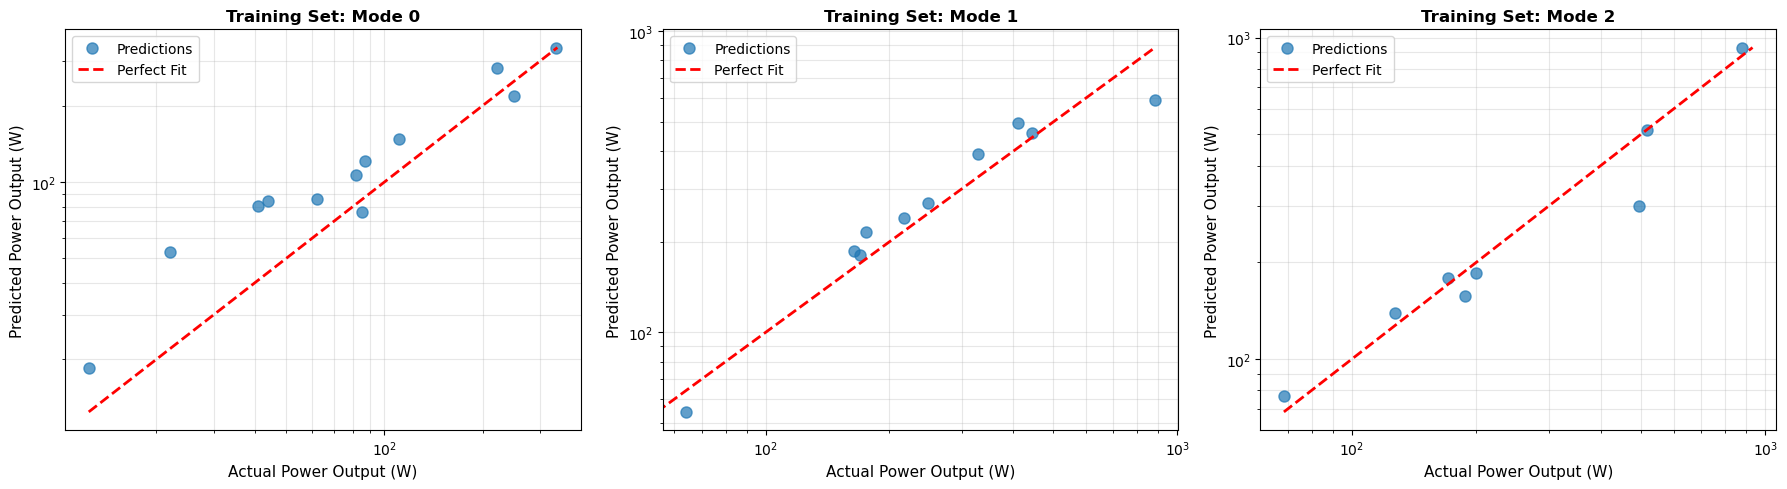

Figure saved as: task4.2_training_loglog.png


In [189]:
# (e) Log-log plots of predicted vs actual power output for training set
# Create separate plots for each Mode (0, 1, 2)

import matplotlib.pyplot as plt

# Create 3 subplots for 3 modes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mode labels
mode_names = ['Mode 0', 'Mode 1', 'Mode 2']

for mode_idx in range(3):
    ax = axes[mode_idx]
    
    # Filter data for this mode
    mask = xarray[:, 0] == mode_idx
    actual = train_actual_Wd[mask]
    predicted = train_pred_Wd[mask]
    
    # Log-log plot
    ax.loglog(actual, predicted, 'o', markersize=8, alpha=0.7, label='Predictions')
    
    # Perfect prediction line (y=x)
    if len(actual) > 0:
        min_val = min(actual.min(), predicted.min())
        max_val = max(actual.max(), predicted.max())
        ax.loglog([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit')
    
    ax.set_xlabel('Actual Power Output (W)', fontsize=11)
    ax.set_ylabel('Predicted Power Output (W)', fontsize=11)
    ax.set_title(f'Training Set: {mode_names[mode_idx]}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('task4.2_training_loglog.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Figure saved as: task4.2_training_loglog.png')

In [190]:
# Additional analysis: Training set performance by Mode

# Calculate MAE for each mode
modes = [0, 1, 2]
print('============================================================')
print('Training Set Performance by Mode')
print('============================================================')

for mode in modes:
    mask = xarray[:, 0] == mode
    if np.any(mask):
        mode_actual_VL = train_actual_VL[mask]
        mode_pred_VL = train_pred_VL[mask]
        mode_actual_Wd = train_actual_Wd[mask]
        mode_pred_Wd = train_pred_Wd[mask]
        
        mae_VL = np.mean(np.abs(mode_pred_VL - mode_actual_VL))
        mae_Wd = np.mean(np.abs(mode_pred_Wd - mode_actual_Wd))
        
        print(f'Mode {int(mode)}:')
        print(f'  Voltage MAE: {mae_VL:.4f} V')
        print(f'  Power MAE: {mae_Wd:.4f} W')
        print(f'  Samples: {np.sum(mask)}')
        print()

print('============================================================')

Training Set Performance by Mode
Mode 0:
  Voltage MAE: 5.1895 V
  Power MAE: 28.3833 W
  Samples: 12

Mode 1:
  Voltage MAE: 18.5709 V
  Power MAE: 96.1052 W
  Samples: 12

Mode 2:
  Voltage MAE: 22.1720 V
  Power MAE: 41.1416 W
  Samples: 8



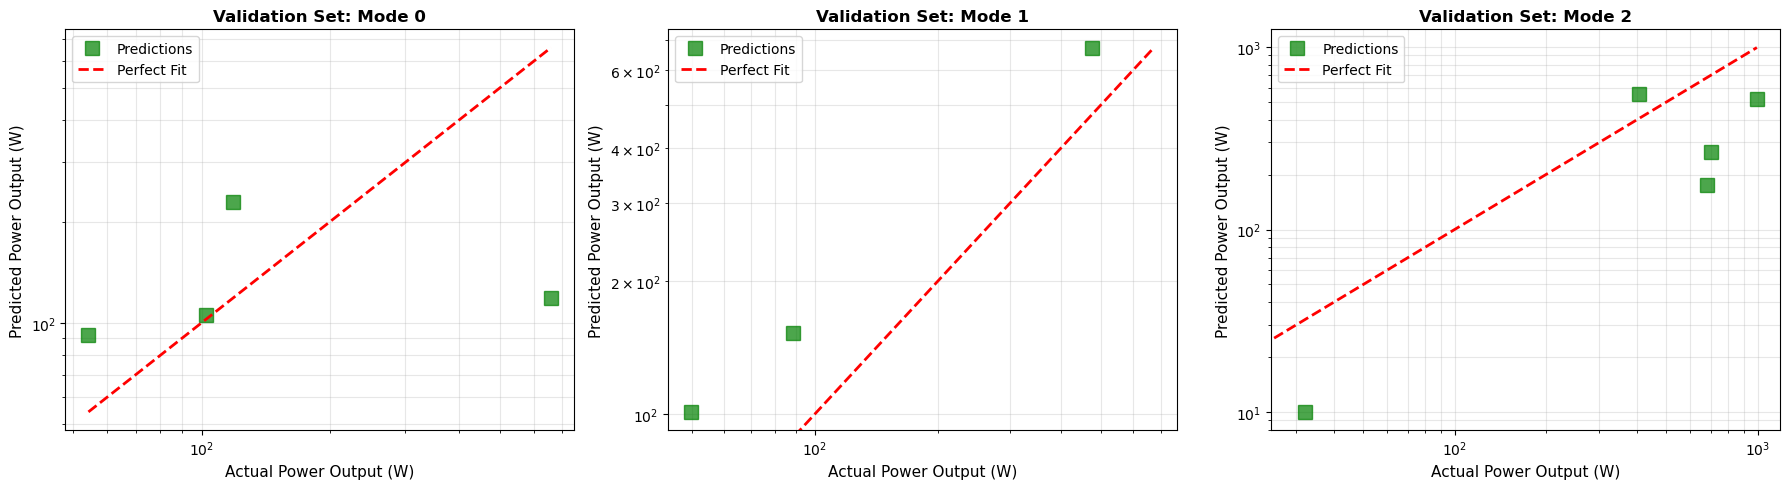

Figure saved as: task4.2_validation_loglog.png


In [191]:
# (f) Log-log plots of predicted vs actual power output for validation set
# Create separate plots for each Mode (0, 1, 2)

# Create 3 subplots for 3 modes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mode labels
mode_names = ['Mode 0', 'Mode 1', 'Mode 2']

for mode_idx in range(3):
    ax = axes[mode_idx]
    
    # Filter data for this mode
    mask = xarray_val[:, 0] == mode_idx
    actual = val_actual_Wd[mask]
    predicted = val_pred_Wd[mask]
    
    # Log-log plot
    ax.loglog(actual, predicted, 's', markersize=10, alpha=0.7, label='Predictions', color='green')
    
    # Perfect prediction line (y=x)
    if len(actual) > 0:
        min_val = min(actual.min(), predicted.min())
        max_val = max(actual.max(), predicted.max())
        ax.loglog([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit')
    
    ax.set_xlabel('Actual Power Output (W)', fontsize=11)
    ax.set_ylabel('Predicted Power Output (W)', fontsize=11)
    ax.set_title(f'Validation Set: {mode_names[mode_idx]}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, which='both')
    ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig('task4.2_validation_loglog.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Figure saved as: task4.2_validation_loglog.png')

In [192]:
# Additional analysis: Validation set performance by Mode

# Calculate MAE for each mode in validation set
print('============================================================')
print('Validation Set Performance by Mode')
print('============================================================')

for mode in modes:
    mask = xarray_val[:, 0] == mode
    if np.any(mask):
        mode_actual_VL = val_actual_VL[mask]
        mode_pred_VL = val_pred_VL[mask]
        mode_actual_Wd = val_actual_Wd[mask]
        mode_pred_Wd = val_pred_Wd[mask]
        
        mae_VL = np.mean(np.abs(mode_pred_VL - mode_actual_VL))
        mae_Wd = np.mean(np.abs(mode_pred_Wd - mode_actual_Wd))
        
        print(f'Mode {int(mode)}:')
        print(f'  Voltage MAE: {mae_VL:.4f} V')
        print(f'  Power MAE: {mae_Wd:.4f} W')
        print(f'  Samples: {np.sum(mask)}')
        print()

print('============================================================')

Validation Set Performance by Mode
Mode 0:
  Voltage MAE: 16.5523 V
  Power MAE: 172.5116 W
  Samples: 4

Mode 1:
  Voltage MAE: 76.0940 V
  Power MAE: 187.0713 W
  Samples: 4

Mode 2:
  Voltage MAE: 71.5838 V
  Power MAE: 417.1725 W
  Samples: 8

